In [1]:
#Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization
from mlxtend.plotting import plot_confusion_matrix

In [2]:
!ls

sample_data


In [3]:
## Collecting The Data Files from Kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d gopendu/devnagari-deeplearn

 93% 62.0M/67.0M [00:03<00:00, 9.89MB/s]
100% 67.0M/67.0M [00:03<00:00, 21.1MB/s]


In [ ]:
!ls

devnagari-deeplearn.zip  kaggle.json  sample_data


In [ ]:
!unzip devnagari-deeplearn.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Train/digit_7/10302.png  
  inflating: Data/Train/digit_7/10303.png  
  inflating: Data/Train/digit_7/10304.png  
  inflating: Data/Train/digit_7/10306.png  
  inflating: Data/Train/digit_7/10307.png  
  inflating: Data/Train/digit_7/104017.png  
  inflating: Data/Train/digit_7/104018.png  
  inflating: Data/Train/digit_7/104019.png  
  inflating: Data/Train/digit_7/104021.png  
  inflating: Data/Train/digit_7/104023.png  
  inflating: Data/Train/digit_7/104024.png  
  inflating: Data/Train/digit_7/104025.png  
  inflating: Data/Train/digit_7/104026.png  
  inflating: Data/Train/digit_7/104027.png  
  inflating: Data/Train/digit_7/104028.png  
  inflating: Data/Train/digit_7/104029.png  
  inflating: Data/Train/digit_7/104030.png  
  inflating: Data/Train/digit_7/104031.png  
  inflating: Data/Train/digit_7/104032.png  
  inflating: Data/Train/digit_7/104033.png  
  inflating: Data/Train/digit_7/104034.png  
  inflati

In [ ]:
!ls

Data  devnagari-deeplearn.zip  kaggle.json  sample_data


In [ ]:
os.listdir('Data')

['test_X.csv', 'submission_format.xlsx', 'Train']

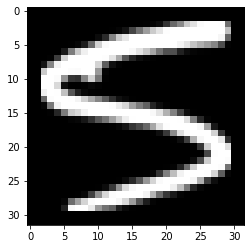

In [ ]:
img = cv2.imread('Data/Train/digit_9/7483.png')
plt.imshow(img)

In [ ]:
img.shape

(32, 32, 3)

In [ ]:
def load_images(folder,X,y):   
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            X.append(img)
            y.append(folder)
    return X,y

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('Data')

In [ ]:
os.chdir('Train')

In [ ]:
len(os.listdir())

46

In [ ]:
os.listdir()

['character_23_ba',
 'character_26_yaw',
 'digit_0',
 'character_6_cha',
 'character_34_chhya',
 'character_8_ja',
 'digit_8',
 'character_32_patalosaw',
 'character_19_dha',
 'character_35_tra',
 'character_2_kha',
 'character_17_tha',
 'character_22_pha',
 'character_36_gya',
 'character_1_ka',
 'character_4_gha',
 'character_12_thaa',
 'character_16_tabala',
 'digit_2',
 'character_28_la',
 'character_24_bha',
 'character_11_taamatar',
 'character_31_petchiryakha',
 'character_27_ra',
 'character_14_dhaa',
 'character_10_yna',
 'digit_5',
 'character_18_da',
 'character_20_na',
 'character_21_pa',
 'digit_6',
 'character_13_daa',
 'digit_1',
 'character_30_motosaw',
 'character_3_ga',
 'character_5_kna',
 'digit_7',
 'digit_9',
 'character_33_ha',
 'digit_4',
 'digit_3',
 'character_15_adna',
 'character_29_waw',
 'character_25_ma',
 'character_9_jha',
 'character_7_chha']

In [ ]:
labels = ['character_31_petchiryakha',
 'character_18_da',
 'character_11_taamatar',
 'character_20_na',
 'digit_9',
 'character_30_motosaw',
 'character_25_ma',
 'character_27_ra',
 'character_7_chha',
 'character_35_tra',
 'digit_3',
 'character_17_tha',
 'character_6_cha',
 'character_13_daa',
 'character_22_pha',
 'character_8_ja',
 'character_33_ha',
 'character_29_waw',
 'character_4_gha',
 'character_2_kha',
 'character_21_pa',
 'character_28_la',
 'character_3_ga',
 'character_9_jha',
 'character_1_ka',
 'character_15_adna',
 'digit_4',
 'digit_0',
 'digit_7',
 'digit_2',
 'character_16_tabala',
 'digit_1',
 'character_14_dhaa',
 'character_36_gya',
 'character_12_thaa',
 'character_19_dha',
 'character_23_ba',
 'character_32_patalosaw',
 'character_26_yaw',
 'character_34_chhya',
 'character_5_kna',
 'digit_8',
 'digit_6',
 'character_24_bha',
 'digit_5',
 'character_10_yna']

In [ ]:
X,y = [],[]
sample_X,sample_y=[],[]
for folder in os.listdir():
  X,y = load_images(folder,X,y)
  sample_X.append(X[-1])
  sample_y.append(y[-1])
sample_X.append(X[1])
sample_y.append(y[1])
sample_X.append(X[2737])
sample_y.append(y[2737])

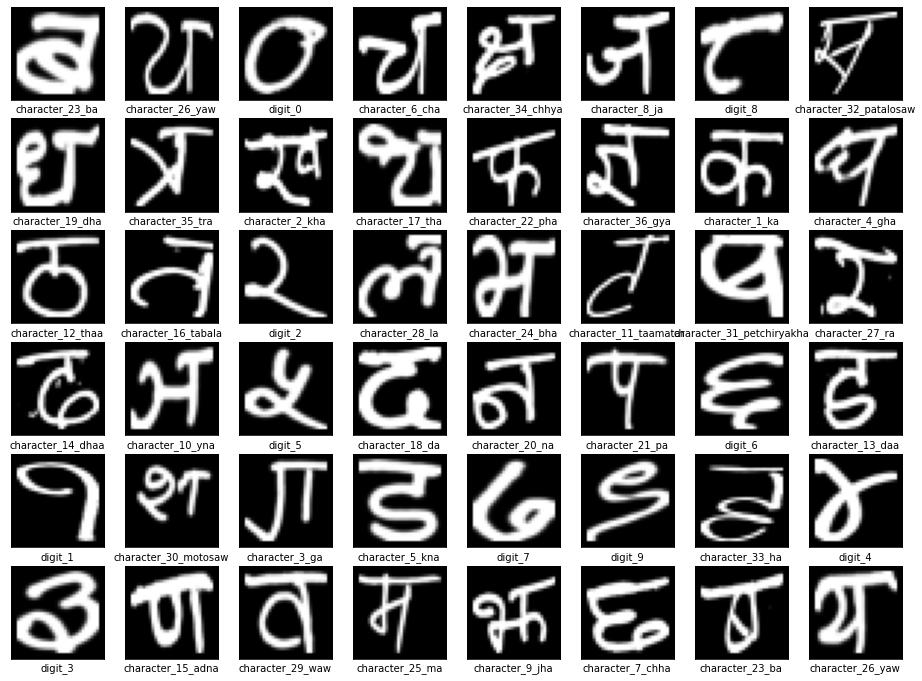

In [ ]:
fig,ax = plt.subplots(nrows=6,ncols=8,figsize=[16,12])
i=0
for row in ax:
  for col in row:
    col.imshow(sample_X[i])
    col.set_xlabel(sample_y[i])
    col.set_xticks([])
    col.set_yticks([])
    i+=1

In [ ]:
fig.savefig('Sample.png')

In [ ]:
print(f'No. of Examples : {len(X)}\nNo. of Classes: 46')

No. of Examples : 78200
No. of Classes: 46


In [ ]:
X = np.array(X).reshape([78200,3072])
y = np.array(y)

In [ ]:
X.shape,y.shape

((78200, 3072), (78200,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7265345268542199

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=[3072]))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(46,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=20)

Epoch 1/20
1760/1760 [==============================] - 8s 4ms/step - loss: 1.2892 - accuracy: 0.6419 - val_loss: 0.6134 - val_accuracy: 0.8226
Epoch 2/20
1760/1760 [==============================] - 7s 4ms/step - loss: 0.7069 - accuracy: 0.7905 - val_loss: 0.4494 - val_accuracy: 0.8633
Epoch 3/20
1760/1760 [==============================] - 7s 4ms/step - loss: 0.5496 - accuracy: 0.8361 - val_loss: 0.3911 - val_accuracy: 0.8854
Epoch 4/20
1760/1760 [==============================] - 7s 4ms/step - loss: 0.4564 - accuracy: 0.8621 - val_loss: 0.3189 - val_accuracy: 0.9020
Epoch 5/20
1760/1760 [==============================] - 7s 4ms/step - loss: 0.4043 - accuracy: 0.8765 - val_loss: 0.3057 - val_accuracy: 0.9057
Epoch 6/20
1760/1760 [==============================] - 7s 4ms/step - loss: 0.3615 - accuracy: 0.8885 - val_loss: 0.2758 - val_accuracy: 0.9207
Epoch 7/20
1760/1760 [==============================] - 7s 4ms/step - loss: 0.3298 - accuracy: 0.8982 - val_loss: 0.2557 - val_accuracy:

In [ ]:
model.save('ANN.h5')

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


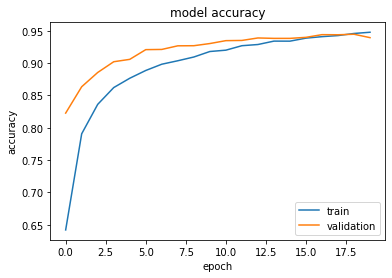

In [ ]:
# Plotting Epoch v/s Accuracy Curve
fig = plt.Figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=4)
plt.savefig('ANN_acc.png')


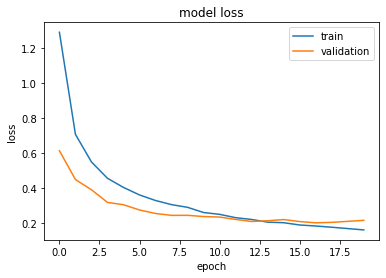

In [ ]:
# Plotting Epoch v/s Loss Curve
fig = plt.Figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=1)
plt.savefig('ANN_loss.png')

In [ ]:
fig.savefig('ANN_loss.jpg')

In [ ]:
model.evaluate(X_test,y_test)

489/489 [==============================] - 1s 2ms/step - loss: 0.2124 - accuracy: 0.9445


[0.2124107927083969, 0.9445012807846069]

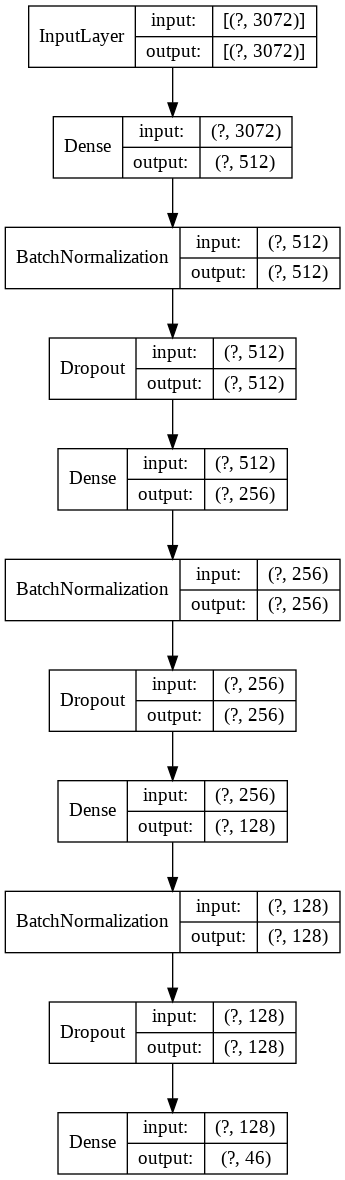

In [ ]:
plot_model(model,to_file='plot_ANN.png',show_shapes=True,rankdir='TB',show_layer_names=False)

In [ ]:
X = X.reshape([X.shape[0],32,32,3])


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [ ]:
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding='valid'))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=46,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
1760/1760 [==============================] - 8s 4ms/step - loss: 1.4211 - accuracy: 0.6163 - val_loss: 0.2109 - val_accuracy: 0.9409
Epoch 2/20
1760/1760 [==============================] - 8s 4ms/step - loss: 0.3231 - accuracy: 0.9022 - val_loss: 0.1802 - val_accuracy: 0.9441
Epoch 3/20
1760/1760 [==============================] - 8s 4ms/step - loss: 0.2103 - accuracy: 0.9369 - val_loss: 0.0971 - val_accuracy: 0.9706
Epoch 4/20
1760/1760 [==============================] - 8s 4ms/step - loss: 0.1743 - accuracy: 0.9465 - val_loss: 0.0721 - val_accuracy: 0.9778
Epoch 5/20
1760/1760 [==============================] - 8s 4ms/step - loss: 0.1360 - accuracy: 0.9581 - val_loss: 0.0578 - val_accuracy: 0.9805
Epoch 6/20
1760/1760 [==============================] - 8s 4ms/step - loss: 0.1212 - accuracy: 0.9619 - val_loss: 0.0514 - val_accuracy: 0.9837
Epoch 7/20
1760/1760 [==============================] - 8s 4ms/step - loss: 0.1043 - accuracy: 0.9683 - val_loss: 0.0578 - val_accuracy:

In [ ]:
model.save('CNN.h5')

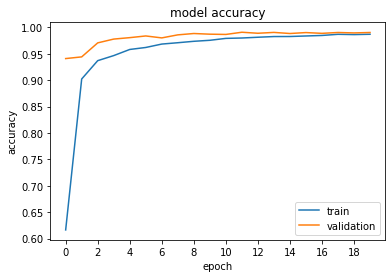

In [ ]:
# Plotting Epoch v/s Accuracy Curve
fig = plt.Figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(0,20,2))
plt.legend(['train', 'validation'], loc=4)
plt.savefig('CNN_acc.png')


In [ ]:
fig.savefig('CNN_acc.jpg')

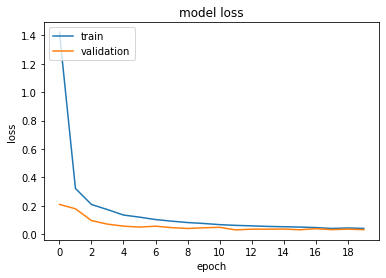

In [ ]:
# Plotting Epoch v/s Loss Curve
fig = plt.Figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0,20,2))
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('CNN_loss.png')


In [ ]:
fig.savefig('CNN_loss.jpg')

In [ ]:
model.evaluate(X_test,y_test)

489/489 [==============================] - 1s 2ms/step - loss: 0.0351 - accuracy: 0.9900


[0.03510945662856102, 0.9900255799293518]

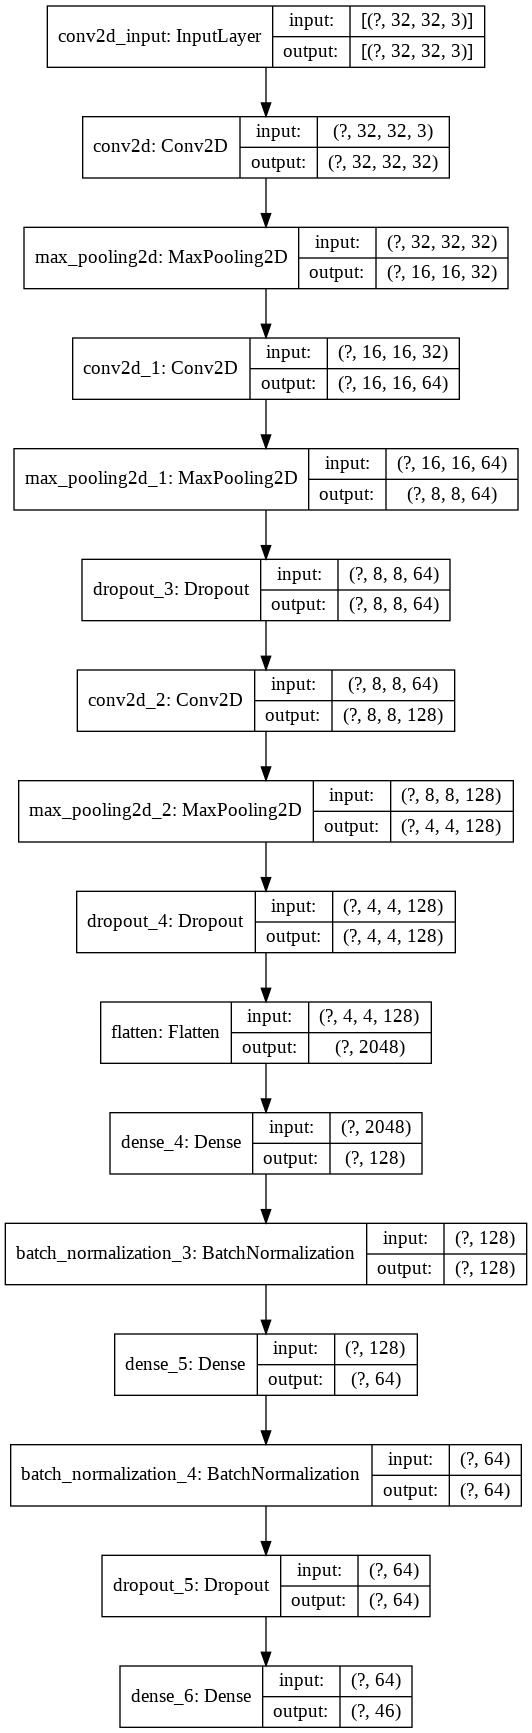

In [ ]:
plot_model(model,to_file='plot_CNN.png',show_shapes=True)

In [ ]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
conf_mat = confusion_matrix(y_pred,y_test)

In [ ]:
conf_mat

array([[339,   0,   0, ...,   0,   0,   0],
       [  0, 334,   0, ...,   0,   0,   0],
       [  0,   0, 340, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 338,   0,   0],
       [  0,   2,   0, ...,   0, 338,   0],
       [  0,   0,   0, ...,   0,   0, 339]])

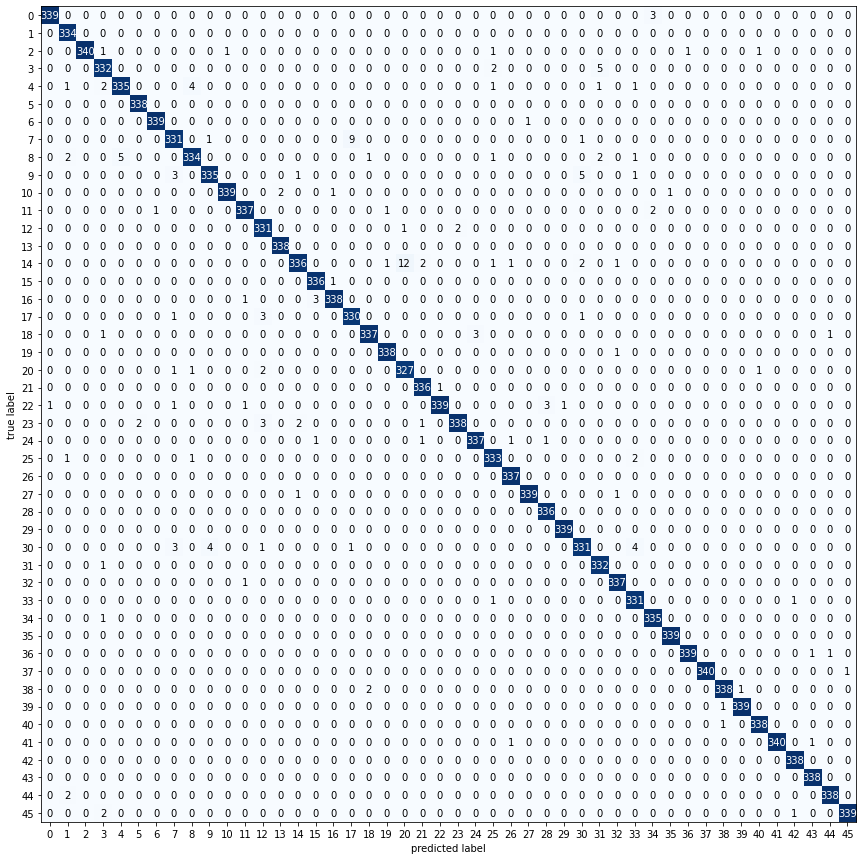

In [ ]:
fig,ax = plot_confusion_matrix(conf_mat,figsize=[15,15])
ax.set_xticks(np.arange(0,46))
ax.set_yticks(np.arange(0,46))
plt.show()

In [ ]:
fig.savefig('conf_mat.png')

In [ ]:
miscls_X = []
miscls_y_pred = []
miscls_y_act = []

In [ ]:
for i in range(len(y_test)):
  if y_test[i]!= y_pred[i]:
    miscls_X.append(X_test[i])
    miscls_y_act.append(y_test[i])
    miscls_y_pred.append(y_pred[i])

In [ ]:
print(f'Total Misclassifications : {len(miscls_X)}')

Total Misclassifications : 170


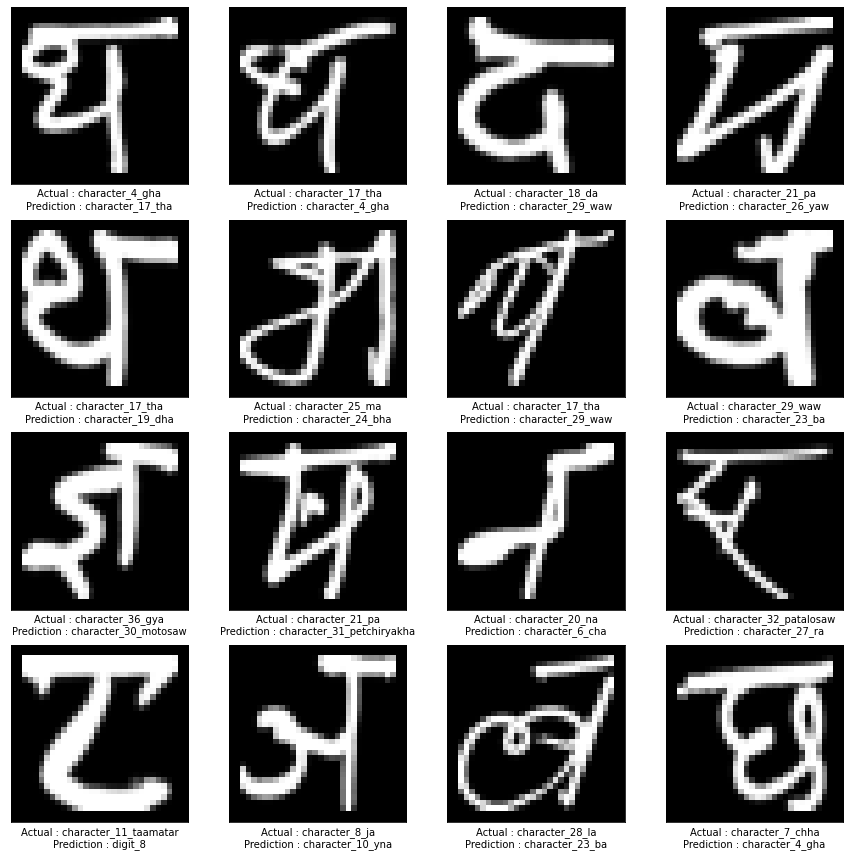

In [ ]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize=[15,15])
i = 0
for row in ax:
  for col in row:
    col.imshow(miscls_X[i])
    col.set_xticks([])
    col.set_yticks([])
    col.set_xlabel(f'Actual : {encoder.inverse_transform([miscls_y_act[i]])[0]}\nPrediction : {encoder.inverse_transform([miscls_y_pred[i]])[0]}')
    i+=1

In [ ]:
fig.savefig('miss_classified.png')

In [ ]:
os.chdir('../')

In [ ]:
os.chdir('../')

In [ ]:
!kaggle datasets download -d ashokpant/devanagari-character-dataset

 61% 5.00M/8.24M [00:00<00:00, 12.1MB/s]
100% 8.24M/8.24M [00:00<00:00, 18.6MB/s]


In [ ]:
!ls

Data				  devnagari-deeplearn.zip  sample_data
devanagari-character-dataset.zip  kaggle.json


In [ ]:
!unzip devanagari-character-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: nhcd/nhcd/numerals/1/028_01.jpg  
  inflating: nhcd/nhcd/numerals/1/028_02.jpg  
  inflating: nhcd/nhcd/numerals/1/028_03.jpg  
  inflating: nhcd/nhcd/numerals/1/028_04.jpg  
  inflating: nhcd/nhcd/numerals/1/028_05.jpg  
  inflating: nhcd/nhcd/numerals/1/029_01.jpg  
  inflating: nhcd/nhcd/numerals/1/030_01.jpg  
  inflating: nhcd/nhcd/numerals/1/030_02.jpg  
  inflating: nhcd/nhcd/numerals/1/030_03.jpg  
  inflating: nhcd/nhcd/numerals/1/030_04.jpg  
  inflating: nhcd/nhcd/numerals/1/032_01.jpg  
  inflating: nhcd/nhcd/numerals/1/032_02.jpg  
  inflating: nhcd/nhcd/numerals/1/033_01.jpg  
  inflating: nhcd/nhcd/numerals/1/033_02.jpg  
  inflating: nhcd/nhcd/numerals/1/034_01.jpg  
  inflating: nhcd/nhcd/numerals/1/034_02.jpg  
  inflating: nhcd/nhcd/numerals/1/035_01.jpg  
  inflating: nhcd/nhcd/numerals/1/035_02.jpg  
  inflating: nhcd/nhcd/numerals/1/036_01.jpg  
  inflating: nhcd/nhcd/numerals/1/036_02.jpg  
  inflati

In [ ]:
!ls

Data				  kaggle.json  sample_data
devanagari-character-dataset.zip  labels.csv
devnagari-deeplearn.zip		  nhcd


In [ ]:
os.chdir('nhcd/nhcd')

In [ ]:
os.listdir()

['numerals', 'vowels', 'consonants']

In [ ]:
def load_test_images(folder,X):   
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(32,32))
        img = cv2.bitwise_not(img)
        if img is not None:
            X.append(img)
    return X

In [ ]:
l = ['numerals','consonants']
new_X = []
for fold in l:
  for folder in os.listdir(fold):
    path = os.path.join(fold,folder)
    new_X = load_test_images(path,new_X)

In [ ]:
len(new_X)

10260

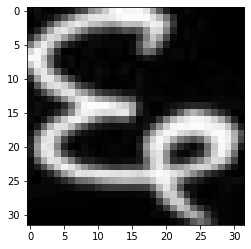

In [ ]:
plt.imshow(new_X[1])

In [ ]:
new_X = np.array(new_X)

In [ ]:
new_X.shape

(10260, 32, 32, 3)

In [ ]:
new_y_pred = model.predict_classes(new_X)

In [ ]:
new_y_pred = encoder.inverse_transform(new_y_pred)

In [ ]:
new_y_pred

array(['digit_6', 'digit_6', 'digit_6', ..., 'character_28_la',
       'character_23_ba', 'character_23_ba'], dtype='<U25')

In [ ]:
sample_pts = np.random.choice(10260,100,replace=False)

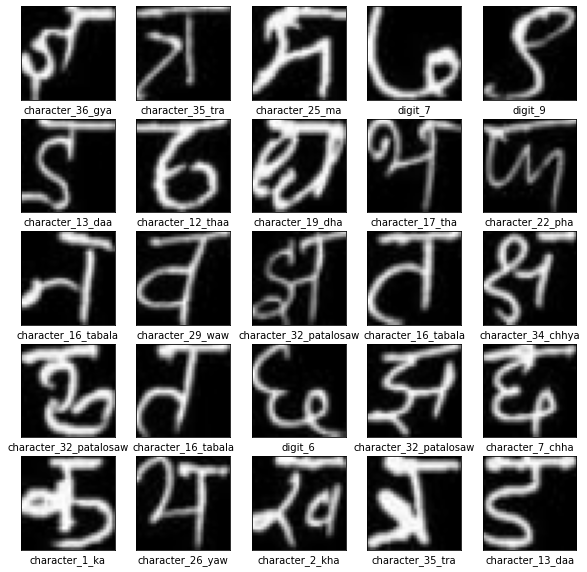

In [ ]:
fig,ax = plt.subplots(nrows=5,ncols=5,figsize=[10,10])
i = 0
for row in ax:
  for col in row:
    img = new_X[sample_pts[i]]
    label = new_y_pred[sample_pts[i]]
    col.imshow(img)
    col.set_xlabel(label)
    col.set_xticks([])
    col.set_yticks([])
    i+=1

In [ ]:
fig.savefig('new_test.png')